In [ ]:
!pip install scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505211 sha256=cac7cc424f4e4fe755f3bfecc5101d1127b75b1d75b02f4913d9b03025f7ba64
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [ ]:
 !pip install numpy==1.23.5 cython==0.29.36
 !pip install scikit-surprise


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 90.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 64.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.12
    Uninstalling Cython-3.0.12:
      Successfully uninstalled Cython-3.0.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
xarray 2025.1.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
jaxlib

In [ ]:
import surprise
print(surprise.__version__)


1.1.4


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

In [ ]:
movies['combined_features'] = movies['title'] + ' ' + movies['genres']

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(movies['combined_features'])

In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [ ]:
def recommend_content_based(movie_title, num_recommendations=10):
    idx = movies[movies['title'] == movie_title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    movie_indices = [i[0] for i in sim_scores[1:num_recommendations+1]]
    return movies['title'].iloc[movie_indices]

In [ ]:
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.2)


In [ ]:
model = SVD()
model.fit(trainset)
predictions = model.test(testset)

In [ ]:
print(f'RMSE: {accuracy.rmse(predictions)}')
print(f'MAE: {accuracy.mae(predictions)}')

RMSE: 1.0407
RMSE: 1.0406824521706945
MAE:  0.8128
MAE: 0.8127795570026447


In [ ]:
def recommend_collaborative(user_id, num_recommendations=10):
    movie_ids = movies['movieId'].unique()
    predictions = [model.predict(user_id, movie_id) for movie_id in movie_ids]
    predictions.sort(key=lambda x: x.est, reverse=True)
    recommended_movie_ids = [pred.iid for pred in predictions[:num_recommendations]]
    return movies[movies['movieId'].isin(recommended_movie_ids)]['title']

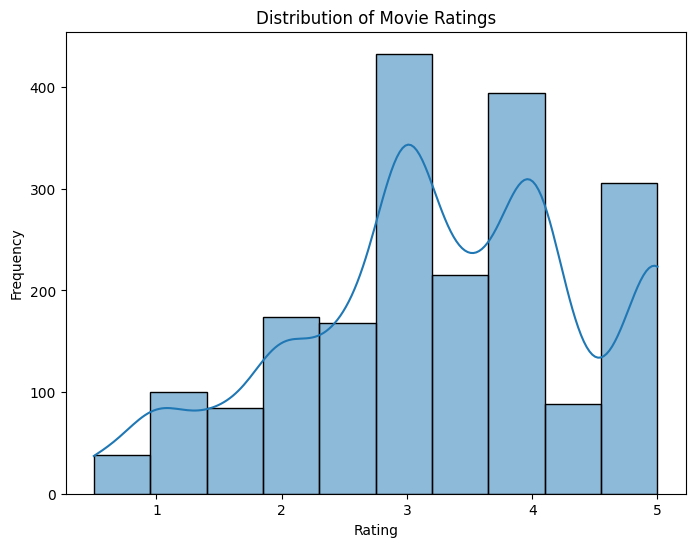

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(ratings['rating'], bins=10, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [ ]:
def recommend_content_based(movie_title, num_recommendations=10):
    if movie_title not in movies['title'].values:
        print("Movie not found. Please check the title.")
        return []

    idx = movies[movies['title'] == movie_title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    movie_indices = [i[0] for i in sim_scores[1:num_recommendations+1]]
    return movies['title'].iloc[movie_indices]


In [ ]:
!pip install rapidfuzz
from rapidfuzz import process

def find_closest_movie(title):
    titles = movies['title'].tolist()
    match, score, _ = process.extractOne(title, titles)
    if score > 70:
        print(f"Closest Match: {match} (Score: {score})")
        return match
    else:
        print("No similar movie found.")
        return None




In [ ]:
closest_movie = find_closest_movie('Toy Story')
if closest_movie:
    print('Content-Based Recommendations:', recommend_content_based(closest_movie))

Closest Match: Toy Story (1995) (Score: 90.0)
Content-Based Recommendations: 124     NeverEnding Story III, The (1994)
551                Pagemaster, The (1994)
12                           Balto (1995)
1592       FairyTale: A True Story (1997)
661                      Space Jam (1996)
1                          Jumanji (1995)
621        All Dogs Go to Heaven 2 (1996)
1944           Black Cauldron, The (1985)
26                    Now and Then (1995)
1510                      Hercules (1997)
Name: title, dtype: object
